In [16]:
import numpy as np
np.random.seed(5)

import matplotlib.pyplot as plt

import pandas as pd
import datetime


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

In [17]:
df = pd.read_csv("consumo_electrico.csv")

In [18]:
df

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,15.766666
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,15.733334
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,15.633333
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,15.566667


array([[<AxesSubplot:title={'center':'Global_active_power'}>,
        <AxesSubplot:title={'center':'Global_reactive_power'}>,
        <AxesSubplot:title={'center':'Voltage'}>],
       [<AxesSubplot:title={'center':'Global_intensity'}>,
        <AxesSubplot:title={'center':'Sub_metering_1'}>,
        <AxesSubplot:title={'center':'Sub_metering_2'}>],
       [<AxesSubplot:title={'center':'Sub_metering_3'}>,
        <AxesSubplot:title={'center':'sub_metering_4'}>, <AxesSubplot:>]],
      dtype=object)

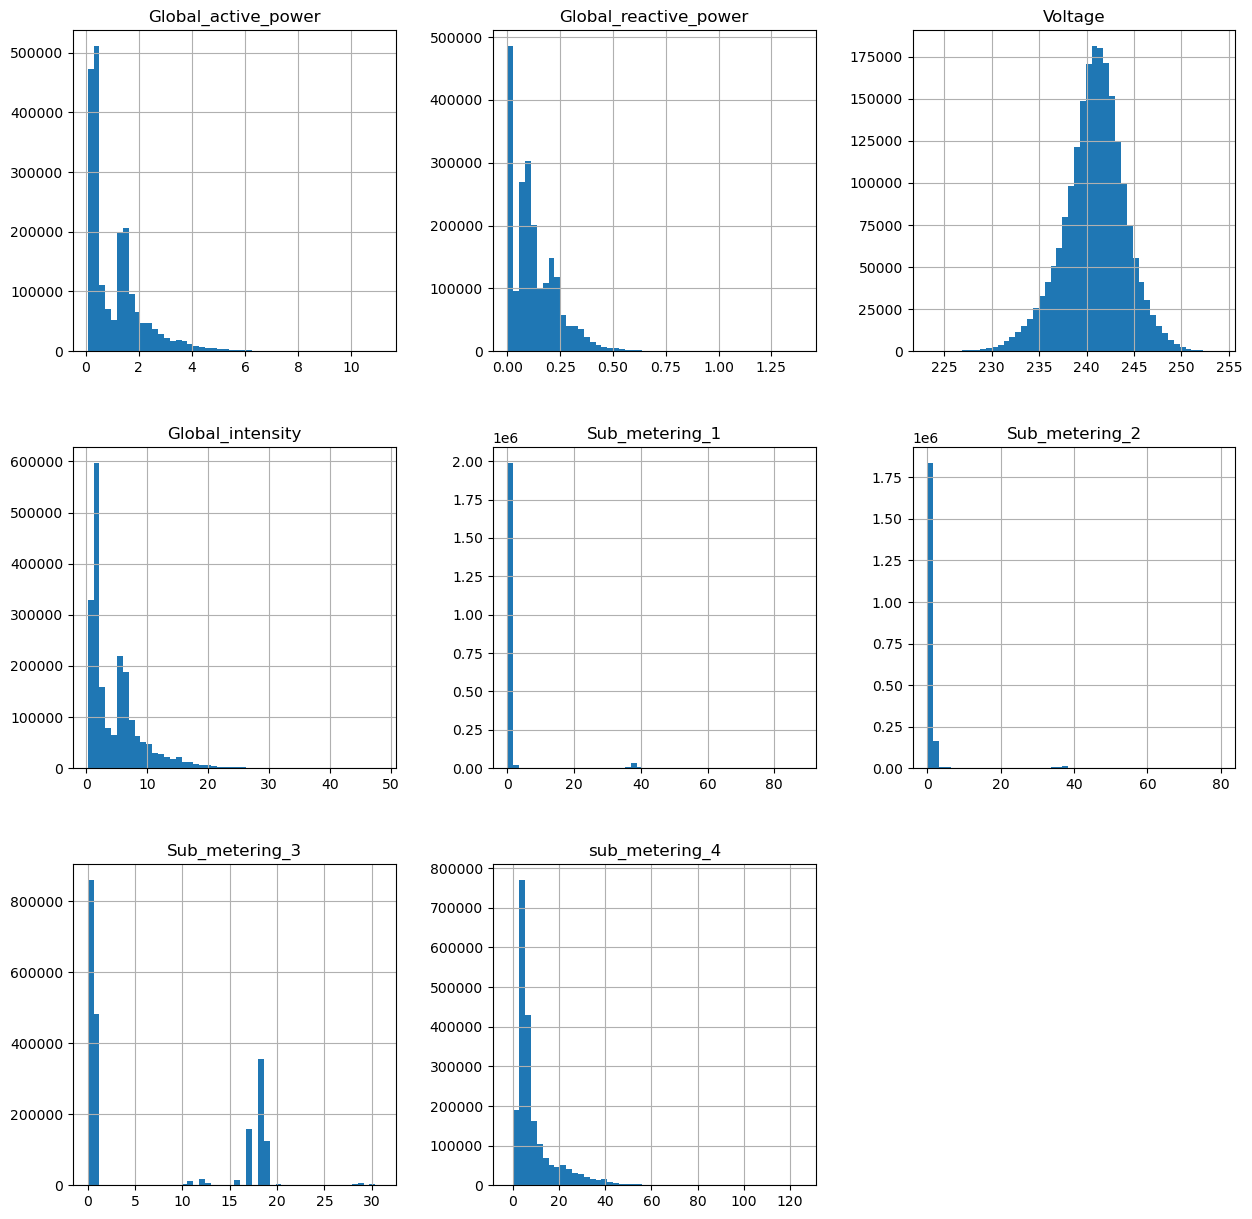

In [19]:
df.hist(bins=50,figsize=(15,15))

In [20]:
corr_matrix = df.corr()
corr_matrix

C:\Users\oscar.torresrodrigue\AppData\Local\Temp\ipykernel_16564\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.247088,-0.396853,0.998884,0.484110,0.434012,0.638966,0.700756
Global_reactive_power,0.247088,1.000000,-0.110802,0.266219,0.123006,0.139321,0.089949,0.211442
Voltage,-0.396853,-0.110802,1.000000,-0.408480,-0.195018,-0.165702,-0.265935,-0.269298
Global_intensity,0.998884,0.266219,-0.408480,1.000000,0.489027,0.439780,0.626952,0.702647
Sub_metering_1,0.484110,0.123006,-0.195018,0.489027,1.000000,0.054468,0.101996,0.124699
Sub_metering_2,0.434012,0.139321,-0.165702,0.439780,0.054468,1.000000,0.081440,0.084800
Sub_metering_3,0.638966,0.089949,-0.265935,0.626952,0.101996,0.081440,1.000000,0.177762
sub_metering_4,0.700756,0.211442,-0.269298,0.702647,0.124699,0.084800,0.177762,1.000000


In [21]:
# from pandas.plotting import scatter_matrix
# matriz = scatter_matrix(df_horas2, figsize=(12,8))

Text(0, 0.5, 'Color bar')

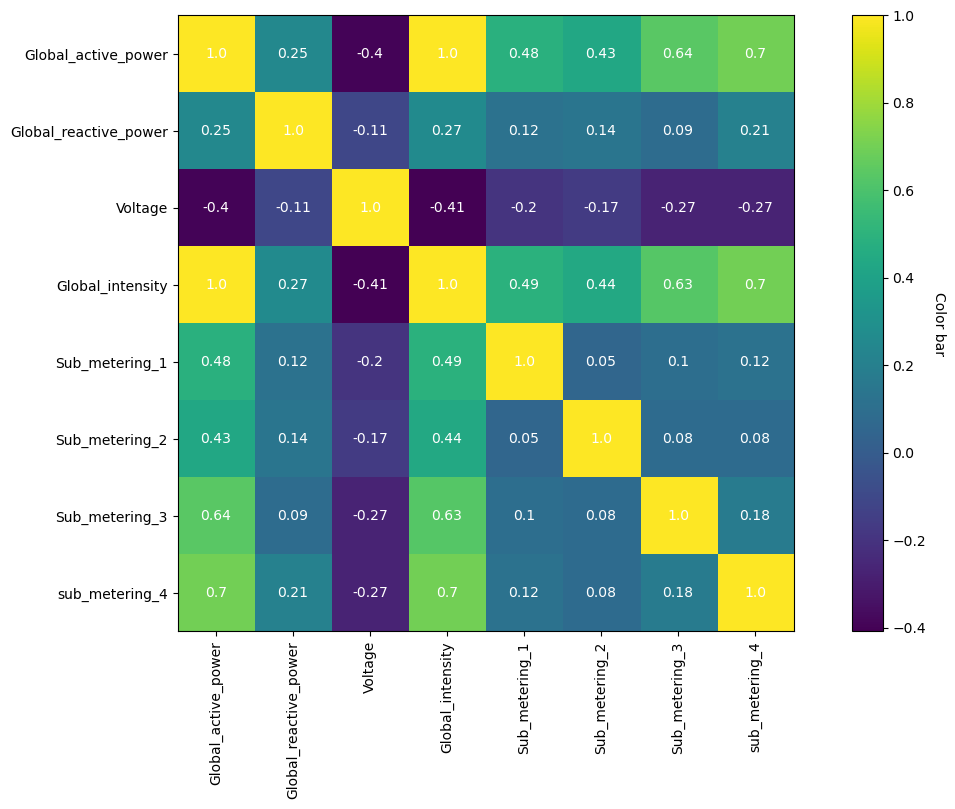

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Etiquetas
xlabs = corr_matrix.columns
ylabs = corr_matrix.index
         
# Mapa de calor
fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(corr_matrix)

# Agregar las etiquetas
ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)

# Agregar los valores a cada celda
for i in range(len(xlabs)):
    for j in range(len(ylabs)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2),
                       ha = "center", va = "center", color = "w")
        
# Agregar la leyenda
# cbar = fig.colorbar(im, ax=ax, label="corr")
# cbar.outline.set_visible(False)
cbar = ax.figure.colorbar(im, ax = ax)
ax.set_xticklabels(xlabs,rotation=90)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

In [23]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [24]:
df_horas = df.resample('H', on='datetime').mean()
df_horas2 = df_horas.rolling(20).mean().dropna()
# df_horas2.reset_index(inplace=True)


In [25]:
df_horas2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-17 12:00:00,2.495733,0.113312,239.433561,10.672833,0.916667,3.696389,7.651389,29.331102
2006-12-17 13:00:00,2.367627,0.110438,239.697400,10.114000,0.916667,3.672500,7.689167,27.182111
2006-12-17 14:00:00,2.290648,0.119307,240.170675,9.764000,0.916667,3.353333,7.757500,26.149972
2006-12-17 15:00:00,2.269907,0.119475,240.533092,9.660167,1.265000,3.291667,7.808333,25.466778
2006-12-17 16:00:00,2.272780,0.120377,240.668608,9.664667,1.694167,3.295000,7.827500,25.063000
...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.128153,0.099883,240.975750,4.733500,0.900000,0.294167,8.978333,8.630056
2010-11-26 18:00:00,1.144448,0.098622,240.753367,4.806500,0.900000,0.294167,8.713333,9.166639
2010-11-26 19:00:00,1.179565,0.097630,240.337283,4.961333,0.900000,0.267500,8.324167,10.167750


### Usaremos la columna de las fechas como la y, ya que lo que queremos es predecir que consumos habra en el futuro

In [26]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
df = min_max.fit_transform(df_horas2[['Global_active_power']])

In [27]:
df.shape

(34570, 1)

In [44]:
from sklearn.model_selection import train_test_split

y = df[1:]
X = df[:-1]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

limite = X.shape[0] - int(X.shape[0]*0.2)
X_train, X_test = X[:limite], X[limite:]
y_train, y_test = y[:limite], y[limite:]

In [43]:
len(X_train)
# limite

27656

In [30]:
def modelo_red_recurrente_3(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.SimpleRNN(50, return_sequences=True, input_shape=[None, 1]),
      keras.layers.SimpleRNN(50, return_sequences=False),
      keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=50)
  return model
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [45]:
modelo = modelo_red_recurrente_3(X_train, y_train)
y_pred = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_red_recurrente_3 = {rms}")

Epoch 1/50
865/865 [==============================] - 3s 1ms/step - loss: 0.0011
Epoch 2/50
865/865 [==============================] - 1s 1ms/step - loss: 3.1836e-04
Epoch 3/50
865/865 [==============================] - 1s 1ms/step - loss: 3.2393e-04
Epoch 4/50
865/865 [==============================] - 1s 1ms/step - loss: 3.2703e-04
Epoch 5/50
865/865 [==============================] - 1s 1ms/step - loss: 3.3318e-04
Epoch 6/50
865/865 [==============================] - 1s 1ms/step - loss: 3.3401e-04
Epoch 7/50
865/865 [==============================] - 1s 1ms/step - loss: 3.2621e-04
Epoch 8/50
865/865 [==============================] - 1s 1ms/step - loss: 3.2794e-04
Epoch 9/50
865/865 [==============================] - 1s 1ms/step - loss: 3.2829e-04
Epoch 10/50
865/865 [==============================] - 1s 1ms/step - loss: 3.2688e-04
Epoch 11/50
865/865 [==============================] - 1s 2ms/step - loss: 3.2346e-04
Epoch 12/50
865/865 [==============================] - 1s 1ms/step 

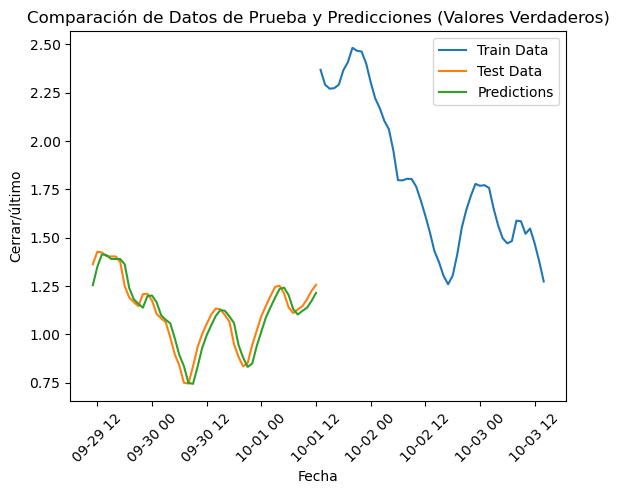

In [46]:
import matplotlib.pyplot as plt

ALL = False

V_Test = len(X_test) if ALL else 50
V_Train = len(X_train) if ALL else 50
# Concatenar los índices de train y test para plotear
index_train = df_horas2.index[len(X_test):][:V_Train]
index_test = df_horas2.index[:len(X_test)][-V_Test:]

# Invertir la transformación de MinMaxScaler para obtener los valores verdaderos
y_train_inverse = min_max.inverse_transform(y_train)
y_test_inverse = min_max.inverse_transform(y_test)
y_pred_inverse = min_max.inverse_transform(y_pred)

# Plot de datos de entrenamiento
plt.plot(index_train, y_train_inverse[:V_Train], label='Train Data')

# Plot de datos de prueba
plt.plot(index_test, y_test_inverse[-V_Test:], label='Test Data')

# Plot de predicciones
plt.plot(index_test, y_pred_inverse[-V_Test:], label='Predictions')

plt.title('Comparación de Datos de Prueba y Predicciones (Valores Verdaderos)')
plt.xlabel('Fecha')
plt.ylabel('Cerrar/último')
plt.legend()
plt.xticks(rotation=45)
plt.show()